In [1]:
from dataloader import val_dataset
import torch
from encoder import Encoder
from distance import scalar_dist
import pickle
import os
from dataloader import val_dataset, tensor_to_image
import matplotlib.pyplot as plt
import numpy as np

/home/spaaceship/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/spaaceship/.local/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/home/spaaceship/.local/lib/python3.10/site-packages/torchvision/image.so: undefined symbol: _ZN3c104cuda20CUDACachingAllocator9allocatorE'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [12]:
i = np.random.randint(0, len(val_dataset)-1)
sample = val_dataset[i]
img_A = sample["img_A"]
img_B = sample["img_B"]
label = sample["label"]

print(img_A.shape, img_B.shape, label.shape)
print(img_A[0].shape)

torch.Size([3, 256, 256]) torch.Size([3, 256, 256]) torch.Size([1, 256, 256])
torch.Size([256, 256])


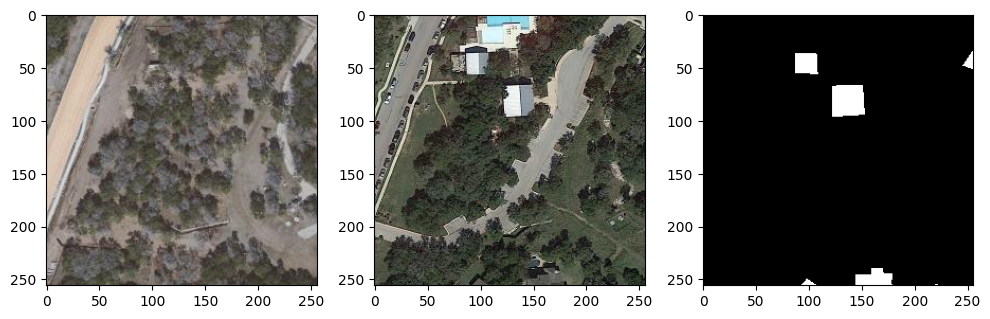

In [13]:

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10,5))
fig.tight_layout()

plt.subplot(1, 3, 1)
plt.imshow(tensor_to_image(sample["img_A"]))

plt.subplot(1, 3, 2)
plt.imshow(tensor_to_image(sample["img_B"]))

plt.subplot(1, 3, 3)
plt.imshow(tensor_to_image(sample["label"]), cmap="gray")  

In [14]:
from encoder import Encoder

In [15]:
model1_enc = Encoder("a2net")

loading imagenet pretrained mobilenetv2
loaded imagenet pretrained mobilenetv2


In [16]:
y1, y2 = model1_enc(img_A.reshape((1,3,256,256)), img_B.reshape((1,3,256,256)))

In [17]:
y1.shape, y2.shape

(torch.Size([4096]), torch.Size([4096]))

In [18]:
y1 = y1.detach().numpy()
y2 = y2.detach().numpy()

In [19]:
import pandas as pd
import numpy as np

In [20]:
df_describe = pd.DataFrame(y1)
df_describe.describe()

,0
count,4096.000000
mean,0.275506
std,0.433519
min,0.000000
25%,0.000000
50%,0.026735
75%,0.413538
max,3.214720


array([[<Axes: title={'center': '0'}>]], dtype=object)

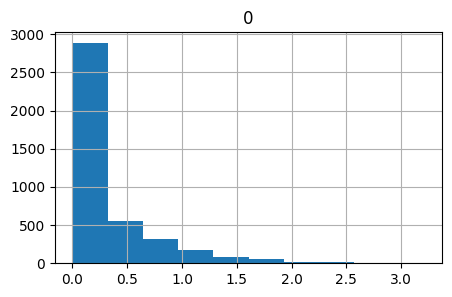

In [21]:
df_describe.hist(figsize=(5,3))

In [22]:
import pickle

In [23]:
def read_list(filename):
    # for reading also binary mode is important
    with open(filename, 'rb') as fp:
        n_list = pickle.load(fp)
        return n_list

In [24]:
blue_data = read_list("./data/a2net/a2net-blue_data.txt")
green_data = read_list("./data/a2net/a2net-green_data.txt")
red_data = read_list("./data/a2net/a2net-red_data.txt")
yellow_data = read_list("./data/a2net/a2net-yellow_data.txt")

In [25]:
blue_df = pd.DataFrame(blue_data)
green_df = pd.DataFrame(green_data)
red_df = pd.DataFrame(red_data)
yellow_df = pd.DataFrame(yellow_data)

In [26]:
import matplotlib.pyplot as plt

In [27]:
yellow_df.describe()

,0
count,1024.000000
mean,5.506822
std,9.106505
min,0.000000
25%,0.000000
50%,0.000000
75%,8.764488
max,50.230385


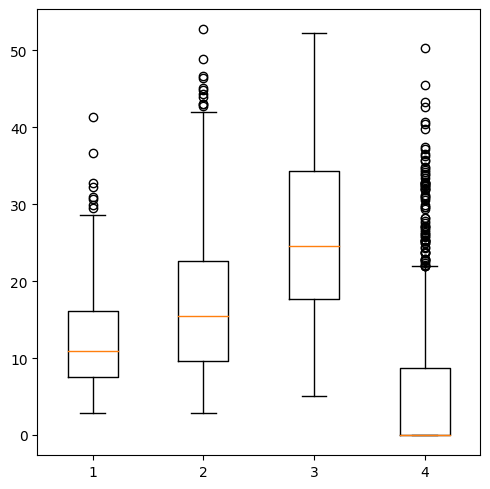

In [28]:
# Set the figure size
plt.rcParams["figure.figsize"] = [5, 5]
plt.rcParams["figure.autolayout"] = True

# Plot the dataframe
plt.boxplot([
    green_data,
    blue_data,
    red_data,
    yellow_data
])

# Display the plot
plt.show()

In [31]:
import seaborn as sns

/tmp/ipykernel_19281/4062908703.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( green_data, hist=False, color="green" )
/tmp/ipykernel_19281/4062908703.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( blue_data, hist=False, color="blue" )
/tmp/ipykernel_19281/406290870

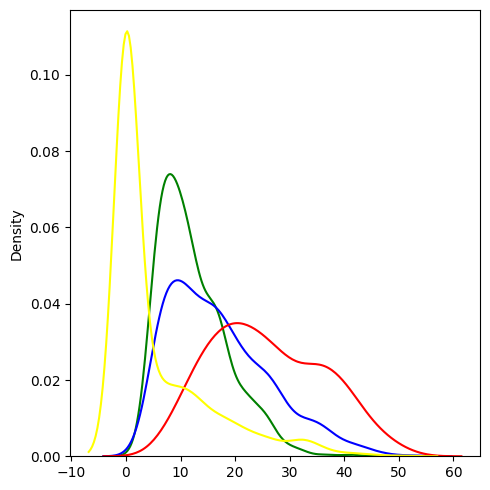

In [40]:
sns.distplot( green_data, hist=False, color="green" )
sns.distplot( blue_data, hist=False, color="blue" )
sns.distplot( red_data, hist=False, color="red" )
sns.distplot( yellow_data, hist=False, color="yellow" )
plt.show()

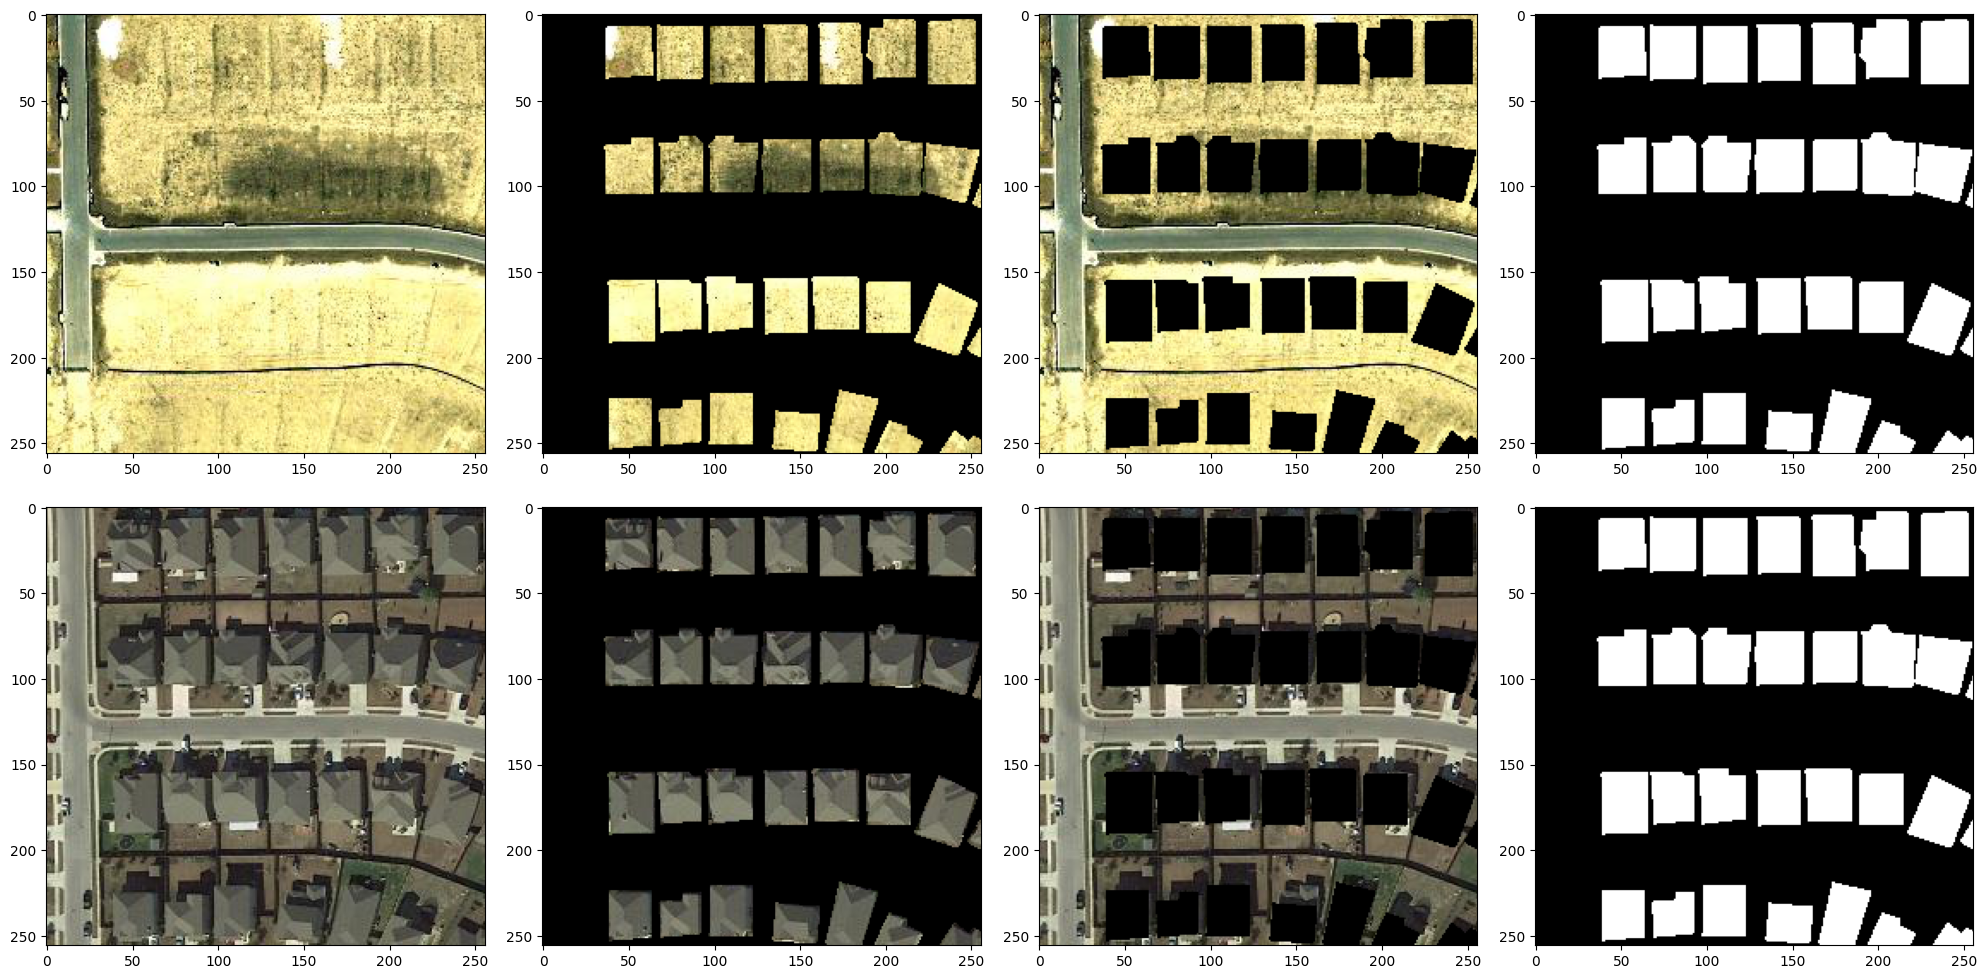

In [30]:
import torch
from encoder import Encoder
from distance import scalar_dist
import pickle
import os
from dataloader import val_dataset, tensor_to_image

def split_image_label (imgA :torch.Tensor, label :torch.Tensor):
    """
    Input: 
        imgA  -> torch.Tensor , 3x256x256\n
        label -> torch.Tensor , 1x256x256
    Output:
        img_1 -> split image where change=1 in label , 3x256x256
        img_2 -> split image where change=0 in label , 3x256x256
    """
    img_1 = imgA.detach().clone()
    img_2 = imgA.detach().clone()

    img_1[0] = torch.where(label[0] == 1, img_1[0], 0.0)
    img_1[1] = torch.where(label[0] == 1, img_1[1], 0.0)
    img_1[2] = torch.where(label[0] == 1, img_1[2], 0.0)

    img_2[0] = torch.where(label[0] != 1, img_2[0], 0.0)
    img_2[1] = torch.where(label[0] != 1, img_2[1], 0.0)
    img_2[2] = torch.where(label[0] != 1, img_2[2], 0.0)

    return img_1, img_2

# Loop over all the datapoints in the validation dataset
i = np.random.randint(0, len(val_dataset)-1)
sample = val_dataset[i]
imgA = sample["img_A"]
imgB = sample["img_B"]
label = sample["label"]

# Encodings for blue and yellow data
imgA_1, imgA_2 = split_image_label(imgA, label)
imgB_1, imgB_2 = split_image_label(imgB, label)


fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
fig.tight_layout()

plt.subplot(2, 4, 1)
plt.imshow(tensor_to_image(sample["img_A"]))

plt.subplot(2, 4, 2)
plt.imshow(tensor_to_image(imgA_1))

plt.subplot(2, 4, 3)
plt.imshow(tensor_to_image(imgA_2))

plt.subplot(2, 4, 4)
plt.imshow(tensor_to_image(sample["label"]), cmap="gray")    


plt.subplot(2, 4, 5)
plt.imshow(tensor_to_image(sample["img_B"]))

plt.subplot(2, 4, 6)
plt.imshow(tensor_to_image(imgB_1))

plt.subplot(2, 4, 7)
plt.imshow(tensor_to_image(imgB_2))

plt.subplot(2, 4, 8)
plt.imshow(tensor_to_image(sample["label"]), cmap="gray")    
